In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy.stats as stats
import seaborn as sns

In [2]:
base = pd.read_csv('mt_cars.csv')
base.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
base = base.drop(['Unnamed: 0'], axis=1)
base.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<Axes: >

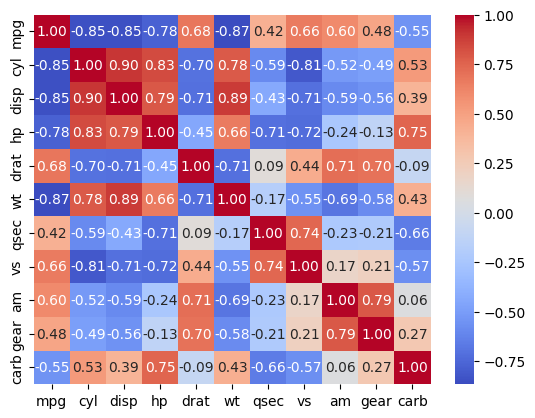

In [9]:
corr = base.corr() # Gerar o Correlograma para verificar a correlação das váriaveis
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')

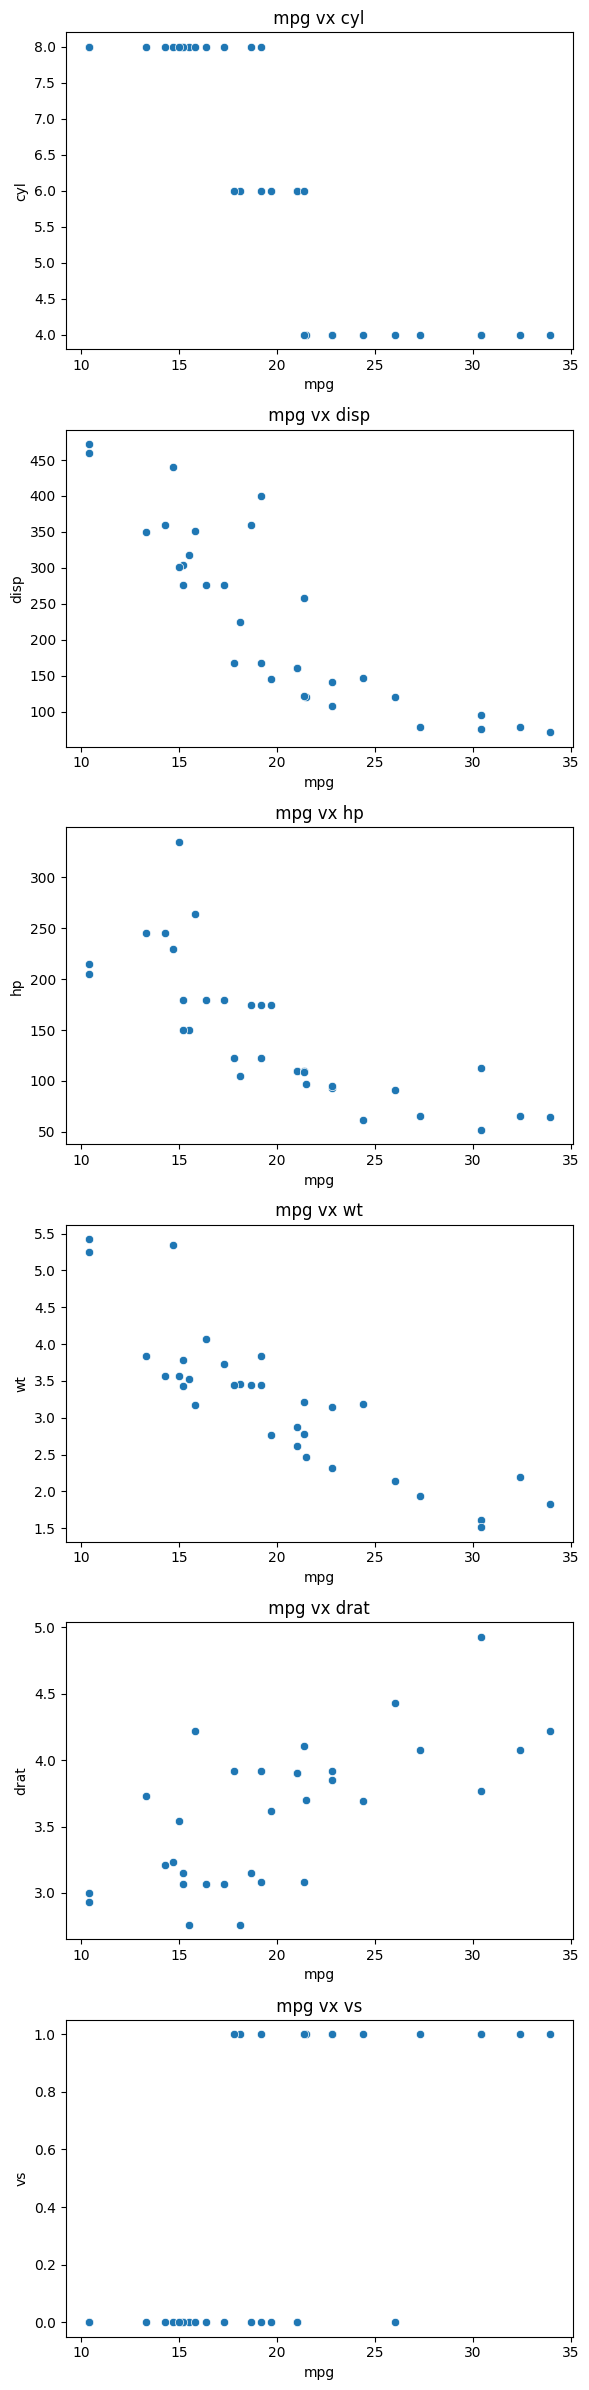

In [10]:
# Gerando uns gráficos de dispersão para algumas colunas
column_pairs = [('mpg', 'cyl'), ('mpg', 'disp'), ('mpg', 'hp'),('mpg', 'wt'), ('mpg', 'drat'),('mpg', 'vs')]
n_plots = len(column_pairs)
fig, axes = plt.subplots(nrows=n_plots, ncols=1, figsize=(6, 4 * n_plots))

for i, pair in enumerate(column_pairs):
    x_col, y_col = pair
    sns.scatterplot(x=x_col, y=y_col, data=base, ax=axes[i])
    axes[i].set_title(f' {x_col} vx {y_col} ')
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(y_col)

plt.tight_layout()
plt.show()

In [22]:
# Variavel dependente a esquerda separada com um til das variáveis independentes.
modelo = sm.ols(formula='mpg ~ wt + disp + hp', data=base) # Como vamos criar nosso modelo
modelo = modelo.fit() # Criamos o modelo
modelo.summary() # Vemos o resumo do modelo
# AIC e BIC são metricas que devem ficar mais baixas, com 'mpg ~ wt + disp + hp' ficam AIC 156.6 e BIC 162.5

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     44.57
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           8.65e-11
Time:                        16:48:32   Log-Likelihood:                -74.321
No. Observations:                  32   AIC:                             156.6
Df Residuals:                      28   BIC:                             162.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.1055      2.111     17.579      0.000      32.782      41.429
wt            -3.8009      1.066     -3.565      0.001      -5.985      -1.617
disp          -0.0009      0.010     -0.091      0.929      -0.022       0.020
hp            -0.0312      0.011     -2.724      0.011      -0.055      -0.008
==============================================================================
Omnibus:                        5.269   Durbin-Watson:                   1.367
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.038
Skew:                           0.856   Prob(JB):                        0.133
Kurtosis:                       3.310   Cond. No.                     1.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Histograma dos Resíduos')

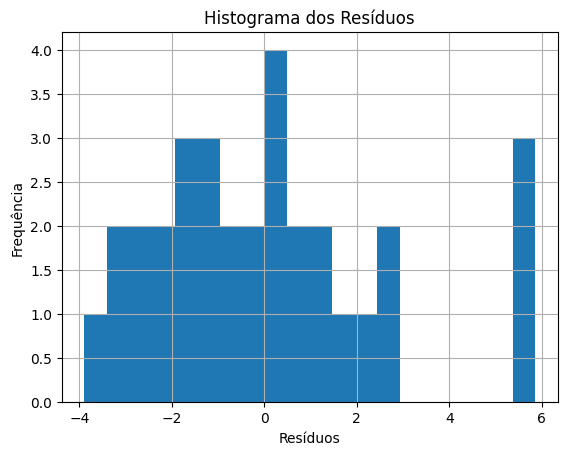

In [15]:
residuos = modelo.resid
residuos.hist(bins=20) # Bins é Número de Eixos
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
# Buscamos sempre uma forma de sino nesse gráfico

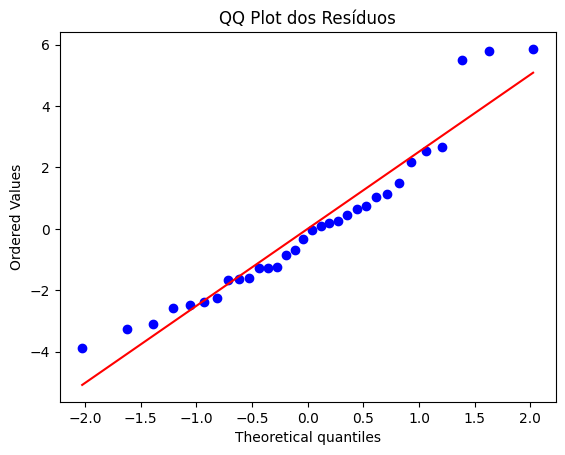

In [18]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('QQ Plot dos Resíduos')
plt.show()
# Espera-se que os pontos estejam tangentes a linha

In [28]:
# Vamos utilizar um teste de hipótese de Shapiro-Wilk
stat, p_value = stats.shapiro(residuos)
print(f'Estatística de Teste: {stat:.3f}')
print(f'Valor-p: {p_value:.3f}')
# Quanto mais proximo de 1 melhor no teste
# Hipotese nula - dados estão normalmente distribuidos
# O valor de p é sabermos se podemos rejeitar a hiposete nulo.
# Se p <= 0.05 eu rejeito.
# Se p > 0.5 eu não rejeito a hipotese nula.  <- Nosso caso é 0.033
# ou seja, os nosso dados não estão normalmente distribuidos.
# precisamos buscar outra combinação de dados.

Estatística de Teste: 0.942
Valor-p: 0.085


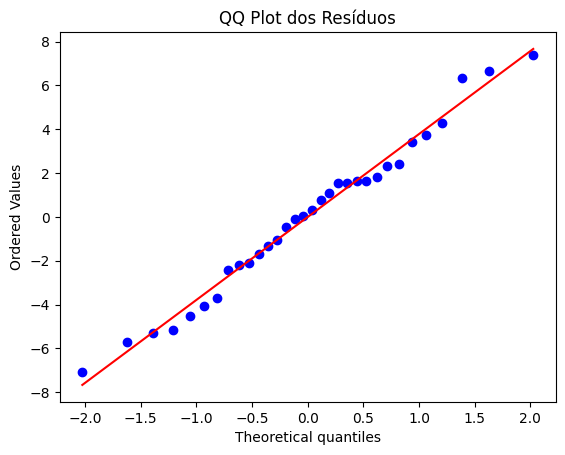

Estatística de Teste: 0.981
Valor-p: 0.822


In [33]:
modelo = sm.ols(formula='mpg ~ drat + vs', data=base)
modelo = modelo.fit()
residuos = modelo.resid
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('QQ Plot dos Resíduos')
plt.show()
stat, p_value = stats.shapiro(residuos)
print(f'Estatística de Teste: {stat:.3f}')
print(f'Valor-p: {p_value:.3f}')
# 0.822 não podemos rejeitar a hipotese nula
# 1) Existem métodos que fazem esses testes automaticamente
# 2) Qual modelo escolher? Interpretação dos resultados da Hipotese Nula junto da performance

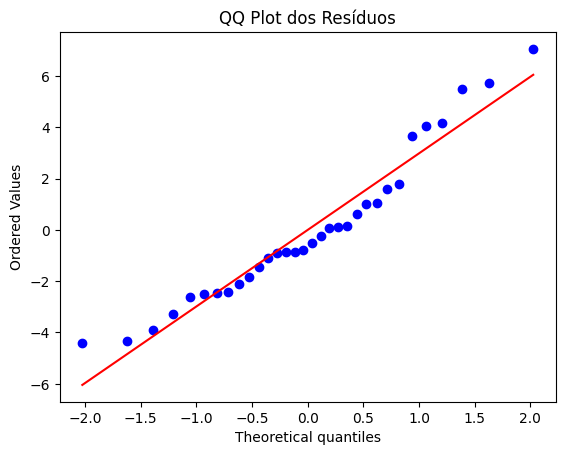

Estatística de Teste: 0.942
Valor-p: 0.085
